### Exercise 5.1

Download the MNIST data set. Perform the following analysis.

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn import tree

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(y_train.shape)
print(X_train.shape)

(60000,)
(60000, 28, 28)


In [4]:
ntrain, image_w, image_h = X_train.shape
ntest = X_test.shape[0]

In [5]:
# data normalization
X_train = X_train/255
X_test  = X_test/255

(a) Do an SVD analysis of the digit images. You will need to reshape each image into a column vector, and each column of your data matrix is a different image.

In [6]:
Xcol_train = np.reshape(X_train, (ntrain, image_w*image_h)).T
Xcol_test  = np.reshape(X_test, (ntest, image_w*image_h)).T

print(Xcol_train.shape)
print(Xcol_test.shape)

(784, 60000)
(784, 10000)


In [7]:
U, S, VT = np.linalg.svd(Xcol_train, full_matrices=False)     

In [8]:
S.shape

(784,)

(b) What does the singular value spectrum look like, and how many modes are necessary for good image reconstruction? (That is, what is the rank $r$ of the digit space?)

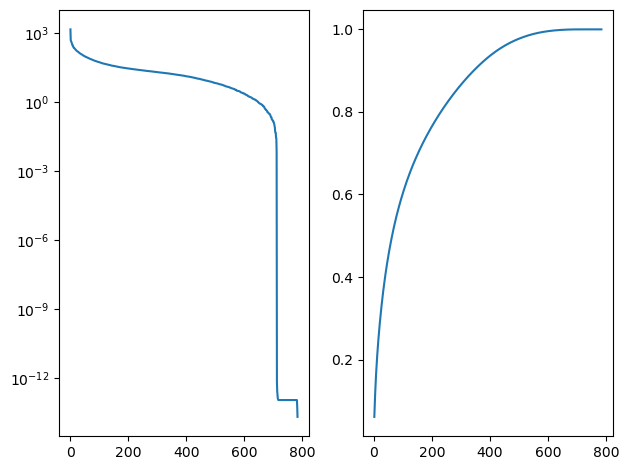

In [9]:
r = np.arange(1, U.shape[1]+1)

fig, axs = plt.subplots(1,2)
axs[0].semilogy(r, S)

# the cumulative sum of singular values as a function of r
axs[1].plot( r, np.cumsum(S)/np.sum(S) )  

fig.tight_layout()

In [10]:
# Find the rank r that captures 90% of the cumulative sum of singular values
r90 = np.min( np.where(np.cumsum(S)/np.sum(S) > 0.90) )
r90

343

(c) What is the interpretation of the $U$, $\Sigma$, and $V$ matrices?

(d) On a 3D plot, project onto three selected $V$ modes (columns) colored by their digit label, for example, columns 2, 3 and 5.

In [11]:
xyz = VT[[1,2,4],:]
xyz.shape

(3, 60000)

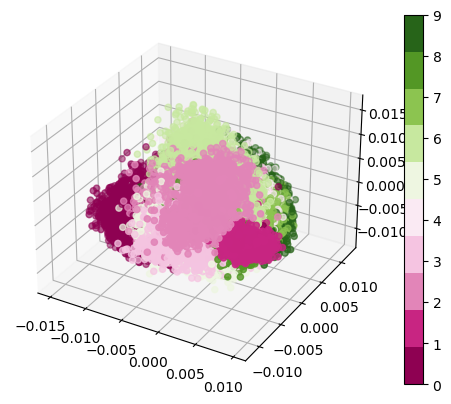

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
cmap = cm.get_cmap('PiYG', 10)
p = ax.scatter(xs=VT[1,:], ys=VT[2,:], zs=VT[4,:], c=y_train, cmap=cmap)
fig.colorbar(p)

Once you have performed the above and have your data projected into PCA space, you will build a classifier to identify individual digits in the training set.

(e) Pick two digits. See if you can build a linear classifier (LDA) that can reasonably identify them.

In [13]:
# pick 0, 5
TF_05 = (y_train == 0) | (y_train == 5)
y_train_05 = y_train[TF_05]

Xcol_train_05 = Xcol_train[:,TF_05]

In [14]:
TF_05 = (y_test == 0) | (y_test == 5)
y_test_05 = y_test[TF_05]

Xcol_test_05 = Xcol_test[:,TF_05]

In [15]:
print(Xcol_train_05.T.shape)
print(y_train_05.shape)

(11344, 784)
(11344,)


In [16]:
LDA_05 = LinearDiscriminantAnalysis()

LDA_05.fit(Xcol_train_05.T, y_train_05)

LinearDiscriminantAnalysis()

In [17]:
TrainingError = np.count_nonzero(np.array(LDA_05.predict(Xcol_train_05.T))-y_train_05)/y_train_05.shape[0]
print("The misclassification error for the training set is given by:", TrainingError)

TestError = np.count_nonzero(np.array(LDA_05.predict(Xcol_test_05.T))-y_test_05)/y_test_05.shape[0]
print("The misclassification error for the test set is given by:", TestError)

The misclassification error for the training set is given by: 0.011547954866008462
The misclassification error for the test set is given by: 0.010683760683760684


(f) Pick three digits. Try to build a linear classifier to identify these three now.

In [18]:
# pick 0, 2, 5
TF_025 = (y_train == 0) | (y_train == 2) | (y_train == 5) 
y_train_025 = y_train[TF_025]

Xcol_train_025 = Xcol_train[:,TF_025]

TF_025 = (y_test == 0) | (y_test == 2) | (y_test == 5)
y_test_025 = y_test[TF_025]

Xcol_test_025 = Xcol_test[:,TF_025]

In [19]:
LDA_025 = LinearDiscriminantAnalysis(n_components=2)

LDA_025.fit(Xcol_train_025.T, y_train_025)

LinearDiscriminantAnalysis(n_components=2)

In [20]:
TrainingError = np.count_nonzero(np.array(LDA_025.predict(Xcol_train_025.T))-y_train_025)/y_train_025.shape[0]
print("The misclassification error for the training set is given by:", TrainingError)

TestError = np.count_nonzero(np.array(LDA_025.predict(Xcol_test_025.T))-y_test_025)/y_test_025.shape[0]
print("The misclassification error for the test set is given by:", TestError)

The misclassification error for the training set is given by: 0.0273956768003699
The misclassification error for the test set is given by: 0.03202479338842975


(g) Which two digits in the data set appear to be the most difficult to seperate? Quantify the accuracy of the seperation with LDA on the test data.

In [21]:
pairs = ['']

for i in np.arange(9):
    for j in np.arange(i+1, 10):
        # print(str(i)+str(j))
        # temp = str(i)+str(j)
        # id = 9*i-0.5*i*(i-1)+(j-i-1)
        pairs.append(str(i)+str(j)) 

In [22]:
pairs = pairs[1:]
# pairs

In [35]:
err_LDA = []
err_SVM = []
err_DT  = []

for i in np.arange(9):
    for j in np.arange(i+1, 10):
        TF1 = (y_train == i) | (y_train == j)
        ytrain = y_train[TF1]
        xtrain = Xcol_train[:,TF1]
        
        TF2 = (y_test == i) | (y_test == j)
        ytest = y_test[TF2]
        xtest = Xcol_test[:,TF2]
        
        LDA = LinearDiscriminantAnalysis()
        LDA.fit(xtrain.T, ytrain)
        
        SVM = svm.SVC()
        SVM.fit(xtrain.T, ytrain)
        
        DT = tree.DecisionTreeClassifier()
        DT.fit(xtrain.T, ytrain)
        
        err_LDA.append( np.count_nonzero(np.array(LDA.predict(xtest.T))-ytest)/ytest.shape[0] )
        err_SVM.append( np.count_nonzero(np.array(SVM.predict(xtest.T))-ytest)/ytest.shape[0] )
        err_DT.append(  np.count_nonzero(np.array( DT.predict(xtest.T))-ytest)/ytest.shape[0] )


In [36]:
pairs[np.argmax(err_LDA)]  # 5,8

'58'

(h) Which two digits in the data set are most easy to seperate? Quantify the accuracy of the seperation with LDA on the test data.

In [37]:
pairs[np.argmin(err_LDA)]  # 6,9

'69'

(i) SVM and decision tree classifiers were the state of the art until about 2014. How well do these seperate between all 10 digits?

(j) Compare the performance between LDA, SVM, and decision trees on the hardest and easiest pair of digits to seperate (from above)

In [38]:
print( pairs[np.argmax(err_SVM)] )  # 4,9
print( pairs[np.argmin(err_SVM)] )  # 1,4

49
14


In [39]:
print( pairs[np.argmax(err_DT)] )  # 4,9
print( pairs[np.argmin(err_DT)] )  # 0,1

49
01
